In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq

In [ ]:
# Read the CSV file
df = pd.read_csv('radar/radar_rotate.csv')
df.head()

In [ ]:
# read the data column from first row and convert array string to numpy array
data0 = np.array(eval(df.iloc[0, 1]))
data1 = np.array(eval(df.iloc[1, 1]))
data2 = np.array(eval(df.iloc[2, 1]))
dataf0 = np.array(eval(df.iloc[-1, 1]))
dataf1 = np.array(eval(df.iloc[-2, 1]))
dataf2 = np.array(eval(df.iloc[-3, 1]))
print("Data shape:", data0.shape)
print("data0", data0)
print("data1", data1)
print("data2", data2)
print("dataf0", dataf0)
print("dataf1", dataf1)
print("dataf2", dataf2)

Data shape: (2048,)
data0 [   0    0    0 ... -124  -52 -372]
data1 [ 402  283  312 ...    6   50 -421]
data2 [ 366  302  342 ...  -14  115 -399]
dataf0 [ -23  -41   19 ...  -69   45 -157]
dataf1 [  -6  -43   48 ...   59   82 -140]
dataf2 [ -16  -24   51 ...   17   45 -128]


/var/folders/xg/bxlxvkzj4m578fz9rzkh0z0c0000gp/T/ipykernel_14692/1229057847.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


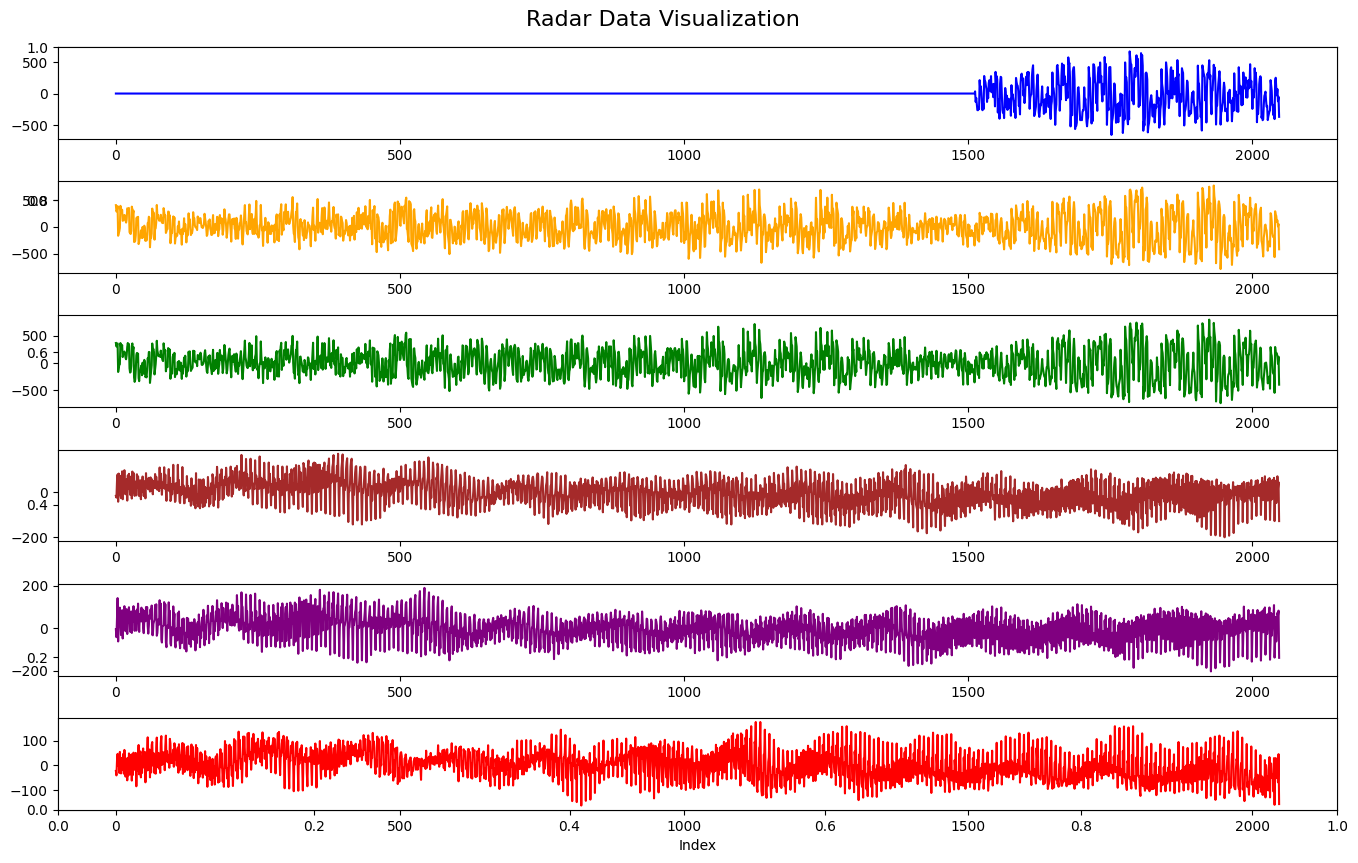

In [98]:
# plot data0, data1, data2, and dataf on subpolots vertically
plt.figure(figsize=(14, 9))
plt.suptitle('Radar Data Visualization', fontsize=16)
plt.legend(loc='upper right')
plt.xlabel('Index')

plt.subplot(6, 1, 1)
plt.plot(data0, label='Data 0', color='blue')

plt.subplot(6, 1, 2)
plt.plot(data1, label='Data 1', color='orange')

plt.subplot(6, 1, 3)
plt.plot(data2, label='Data 2', color='green')

plt.subplot(6, 1, 4)
plt.plot(dataf2, label='Data Final 2', color='brown')

plt.subplot(6, 1, 5)
plt.plot(dataf1, label='Data Final 1', color='purple')

plt.subplot(6, 1, 6)
plt.plot(dataf0, label='Data Final 0', color='red')

plt.tight_layout()


/var/folders/xg/bxlxvkzj4m578fz9rzkh0z0c0000gp/T/ipykernel_14692/1069867318.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


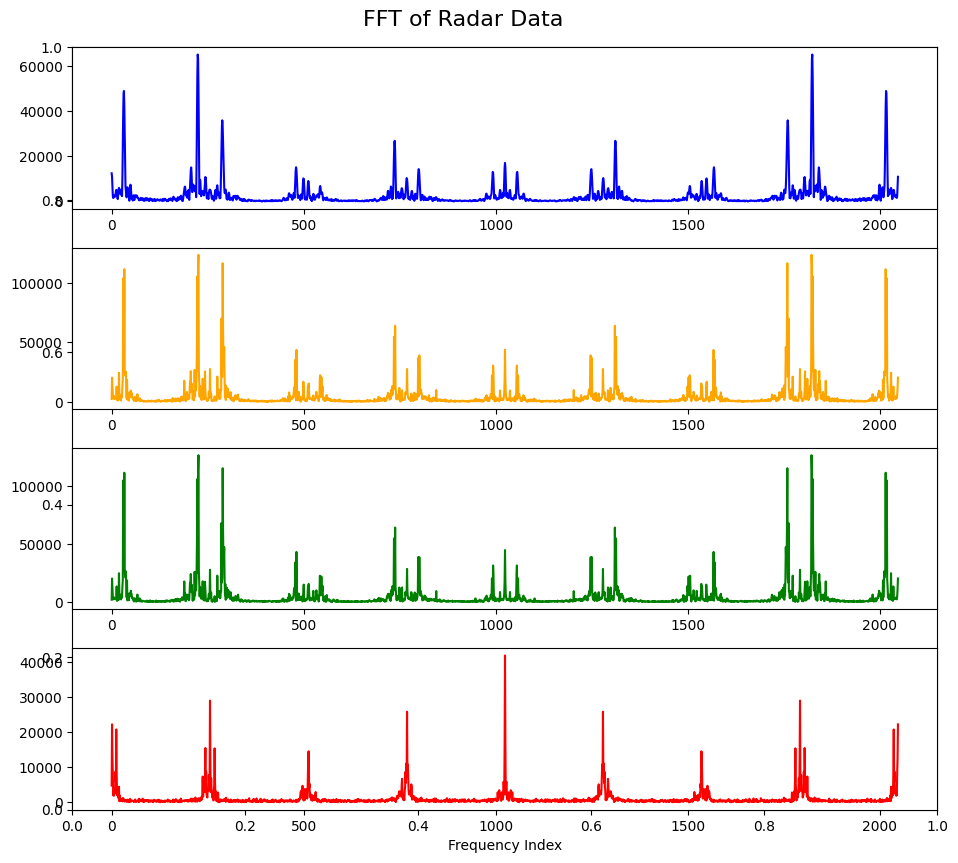

In [91]:
# Do FFT on data0, data1, data2, and dataf
fft_data0 = fft(data0)
fft_data1 = fft(data1)
fft_data2 = fft(data2)
fft_dataf = fft(dataf0)

# Plot the FFT results
plt.figure(figsize=(10, 9))
plt.suptitle('FFT of Radar Data', fontsize=16)
plt.legend(loc='upper right')
plt.xlabel('Frequency Index')

plt.subplot(4, 1, 1)
plt.plot(np.abs(fft_data0), label='FFT Data 0', color='blue')
plt.subplot(4, 1, 2)
plt.plot(np.abs(fft_data1), label='FFT Data 1', color='orange')
plt.subplot(4, 1, 3)
plt.plot(np.abs(fft_data2), label='FFT Data 2', color='green')
plt.subplot(4, 1, 4)
plt.plot(np.abs(fft_dataf), label='FFT Data Final', color='red')

plt.tight_layout()

In [ ]:
ADC_SAMPLING_RATE = 6000  # Hz, TODO

# FFT on all data streams in pandas
ffts = df.iloc[:, 1].apply(lambda x: fft(np.array(eval(x)))).values
ffts = np.vstack([np.abs(f) for f in ffts]).T  # Shape: (fft_len, num_samples)

# freq vals
freqs = fftfreq(len(data0), 1/ADC_SAMPLING_RATE)

# timestamps in sec
timestamps = pd.to_datetime(df.iloc[:, 2])
tds = (timestamps - timestamps.iloc[0]).dt.total_seconds().values

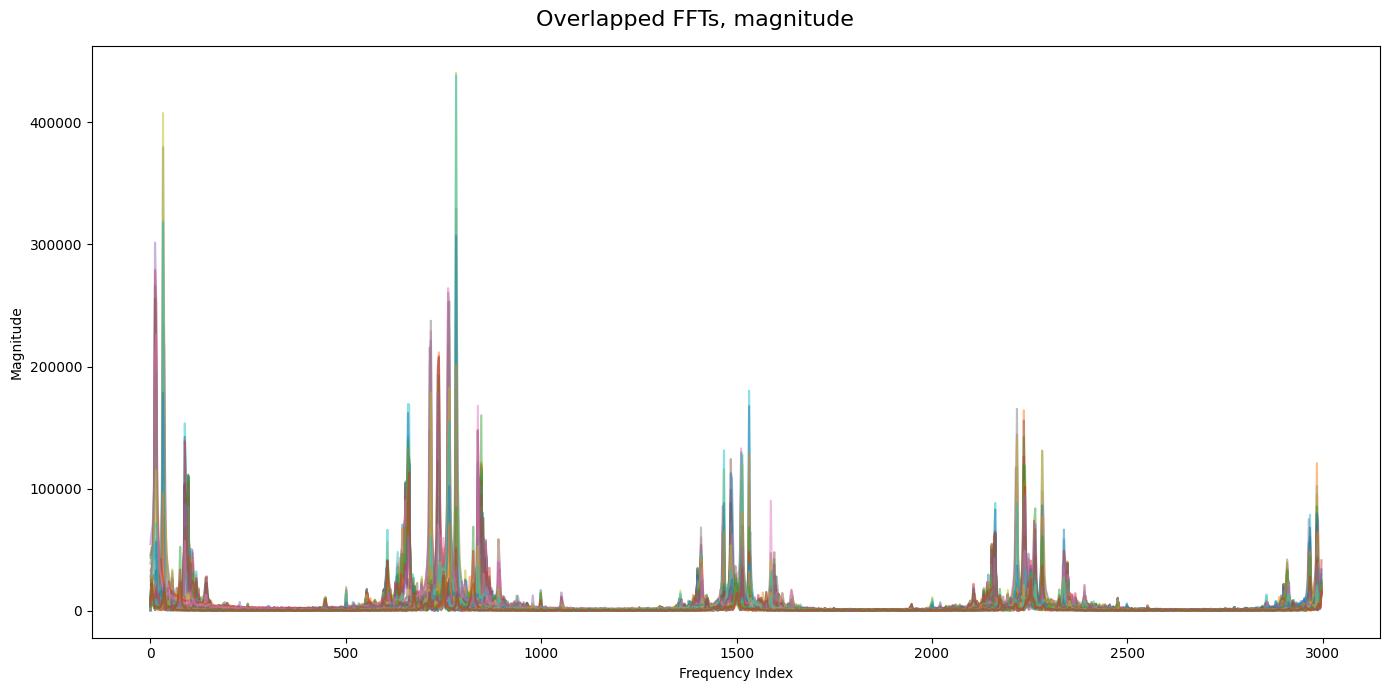

In [93]:
plt.figure(figsize=(14, 7))
plt.suptitle('Overlapped FFTs, magnitude', fontsize=16)
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
for i in range(ffts.shape[1]):
    plt.plot(freqs[:len(freqs)//2], np.abs(ffts[:len(freqs)//2, i]), label=f'Sample {i+1}', alpha=0.5)
plt.tight_layout()

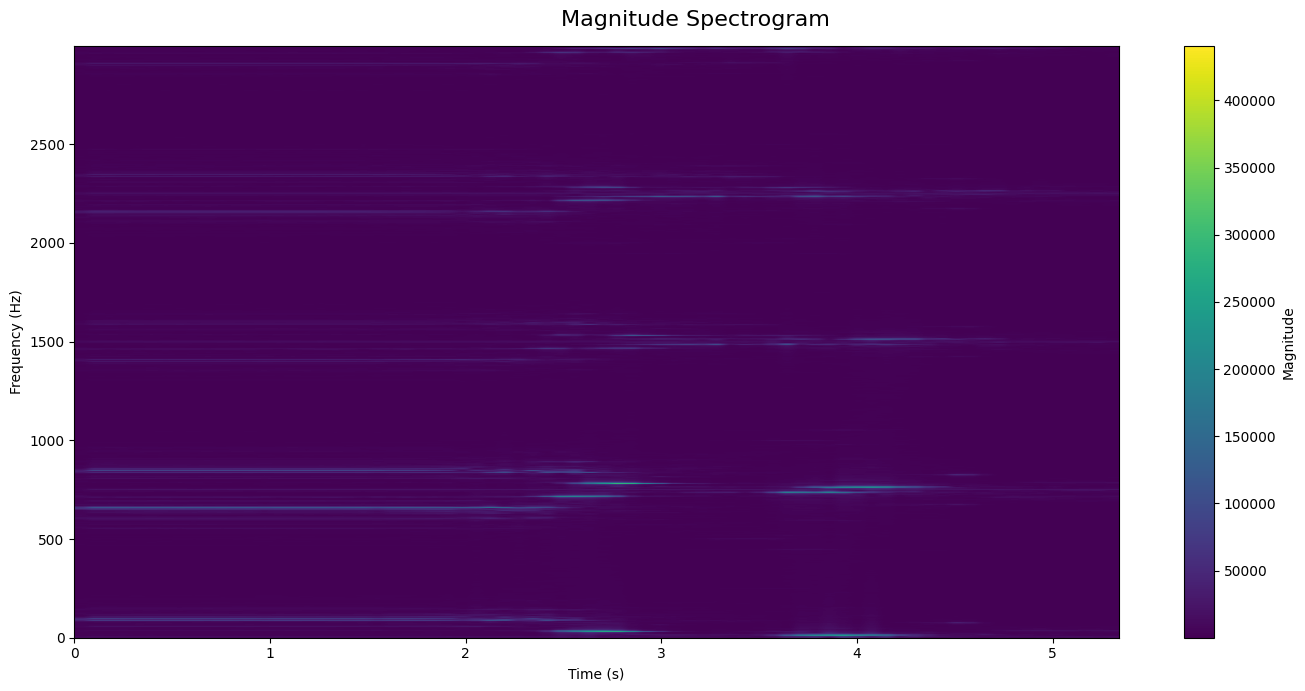

In [94]:
plt.figure(figsize=(14, 7))
plt.suptitle('Magnitude Spectrogram', fontsize=16)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
extent = [0, tds[-1], 0, max(freqs)]
plt.imshow(np.abs(ffts[:len(freqs)//2, :]), aspect='auto', extent=extent, origin='lower', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.tight_layout()